# Overview
Many systems of interest involve exceedingly many particles.  For example, the diffusion of perfume particles involves the complicated motion of a number of particles on the order of Avogadro's number.  The mere thought of using Newton's laws to model the motion of all of these particles is unthinkable.  (your computer probably doesn't even have enough memory to store the locations of that many particles)  However, we can gain much insight into systems like these by modeling the motion of the particles using a random walk.    Topics for today include:


1. Random numbers in Python. (bonus: list comprehension)
2. One-dimensional random walks.
3. Self-avoiding walks. (SAWs)


### Random Numbers in Python

Python libraries for generating random numbers are readily available.  Below you will find some examples.


1. <span style="color:red">By adding print statements and observing outputs, determine what each function below does. </span>
2. <span style="color:red">Add a detailed comment to help you for future use. </span>




In [5]:
from numpy.random import random,randint,randn,choice

a = random(3) # make a 3-length array full of random numbers between 0 and 1
b = random([3,4]) # make a 3x4 (3 rows, 4 columns) array of random numbers between 0 and 1
c = randint(0,10,5) # generates 5 numbers between 0 and 10, stored in an array
d = randn(6) # generates 6 numbers from a gaussian distribution with a mean of 0 and standard deviation of 1
e = choice(["Julia", "Python", "C++"]) # randomly picks one of the three to produce
print('a:',a)
print('b:',b)
print('c:',c)
print('d:',d)
print('e:',e)

a: [0.7360924  0.79461089 0.70437572]
b: [[0.705645   0.17748276 0.57034929 0.78710273]
 [0.42064605 0.77513629 0.69045714 0.23805444]
 [0.57056958 0.56265684 0.96238453 0.43707565]]
c: [2 3 4 4 1]
d: [ 0.08435969  0.87182458 -0.05009173 -1.802623    0.81792144  0.4944056 ]
e: C++


### List Comprehension

As a side note, I want to mention something called list comprehension in Python.  List comprehension combines loops and lists into a single statement, and they turn out to be pretty handy occassionally.  The cell below gives an example:


1. <span style="color:red">Study the code and the output until you understand fully.   </span>
2. <span style="color:red"> Add comments to help you remember.  </span>
3. <span style="color:red"> Use list comprehension to find all numbers $x < 100$ that are multiples of both 3 and 7. (Hint: There are four of them.) </span>

In [9]:
a = random(10)

b = [x < 0.5 for x in a] # return whether each value is less than 1/2

c = [x for x in a if x < 0.75 ] # keep only the values less than 0.75

d = [x for x in a if x < 0.75 and x > 0.25] # keep only values between 0.25 and 0.75

e = [x if x < 0.75 and x > 0.25 else 0 for x in a ] # turns values that are outside of the 0.25~0.75 range to 0

print('b:',b)
print('c:',c)
print('d:',d)
print('e:',e)


b: [False, False, True, False, False, True, False, True, False, True]
c: [0.5296608565396054, 0.31646792967262893, 0.6044579788961789, 0.01199805765066142, 0.2835079455871127, 0.03628463908256885]
d: [0.5296608565396054, 0.31646792967262893, 0.6044579788961789, 0.2835079455871127]
e: [0, 0.5296608565396054, 0.31646792967262893, 0.6044579788961789, 0, 0, 0, 0.2835079455871127, 0, 0]


## Random Walks

Let's start simple and consider a one-dimensional random walk. We'll assume that the length of each step is fixed at 1 and the only thing random about the walk is the direction. (right or left.)   Let's write a code that performs a random walk for 100 steps and see where it ends up.  The code below has two implementations of this algorithm: one rather brute-force and not elegant, and the other very succinct and speedy.


1. <span style="color:red">Execute the cell and interpret the output. </span>
2. <span style="color:red"> Study the code until you understand what each line does.  </span>
3. <span style="color:red"> Add comments to help you remember.  </span>



In [2]:
from numpy.random import random,choice
from numpy import cumsum

#Method 1
myWalker = [0] # start at 0
for i in range(100): # for 100 steps
    a = random() # pick a random number
    if a < 0.5:
        myWalker.append(myWalker[-1] + 1) # 50% chance to walk to the right
    else:
        myWalker.append(myWalker[-1] - 1) # 50% chance to walk to the left
        
        
# Method 2
walker = cumsum(choice([-1,1],100)) # the cumulative sum of making 100 choices between -1 and 1

print(walker[-1])
print(myWalker[-1])

-20
2


The code above performed **a single** random walk.  To get any meaningful results, we should perform **many** random walks and average over them all.  

1. <span style="color:red"> Using the code above as a starting point, write a code that performs 500 random walks in one-dimension.  </span>
2. <span style="color:red"> Compute the mean square displacement $\langle x^2\rangle$ over all walkers (numpy arrays will be your friend) and re-create figure 7.3 b. You should notice that the relationship between  $\langle x^2\rangle$ and number of steps is **linear**, which is not what would happen if the particle diffused at constant speed.</span>
3. <span style="color:red"> Modify your code so that the probability of a right step is not equal to the probability of a left step.  This is called a biased random walk.  Do your results make sense?  </span>





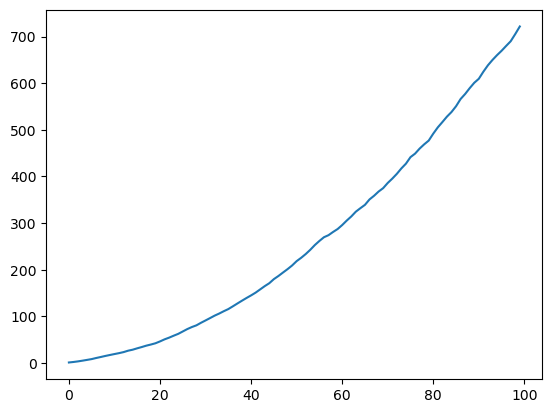

In [13]:
from numpy import zeros,ones
from matplotlib import pyplot as plt

L = 100
N = 500

walks = zeros([N,L])

for i in range(walks.shape[0]):
    walks[i] = choice([-1,-1,-1, 1,1,1,1,1],L)

dist = zeros(L)
for i in range(N):
    dist[:] += cumsum(walks[i])[:]**2 / N

plt.plot(range(L),dist)
plt.show()

# It does make sense that remdom walks with a bias would produce curvature in the graph. This is because
# over time the walk will inevitably leave 0, which would cause the squared behavior to show up.

## Self-avoiding Walks (SAWs)
Random walks have applications in other areas of science as well. One notable example from the field of biology is protein folding. Proteins are composed of long chains of amino acids and each link in the chain can rotate and stretch. This usually creates a protein that is not long and straight, but rather coiled up with many turns and twists.  We can model the shape of a protein using a random walk.  Each step in the walk corrsponds to a new link in the protein.  But there is one complication: **The protein chain can't fold back onto itself.**  This seemingly harmless modification to our random walk turns out to be quite a challenge.  There are two approaches to constructing self-avoiding walks (SAWs):

1. Proceed as we did before, beginning with a 0-length SAW and letting it grow to the desired length.  If you ever encounter a step that causes you to re-visit a previously visited site, you throw the entire random walker out(very important!) and start over again.  This process continues until you have enough SAWs to take averages.  (Some of you will do this for your problem this week)
2. The first method is computationally costly because many you will encounter many invalid walkers and have to throw them out. This wastes computing time and results in a longer loop to achieve desired results.  One way around this problem is to simply simply enumerate **all possible SAWs** of length $n$.  The algorithm that does this is called a depth-first tree search algorithm and it comes up repeatedly in computational science.

Below you will find a code that enumerates **all** possible SAWs of a given length for a two-dimesional square lattice. It's an implementation of the code outlined in example 7.2 in the book.  Although short in length, the code is quite sophisticated.  

1. <span style="color:red"> Execute the code for several lengths and verify that the number of walkers found agrees with table. 7.1 in the book.  </span>
2. <span style="color:red"> By comparing the code below to the pseudo code given in example 7.2, determine what each line of code is doing.</span>
3. <span style="color:red"> Add comments to help you remember in the future.  </span>
4. <span style="color:red"> Plot several walkers to convince yourself that they are all indeed self-avoiding.  </span>





There are 780 SAWs of length 6. Plotting the 135-rd one


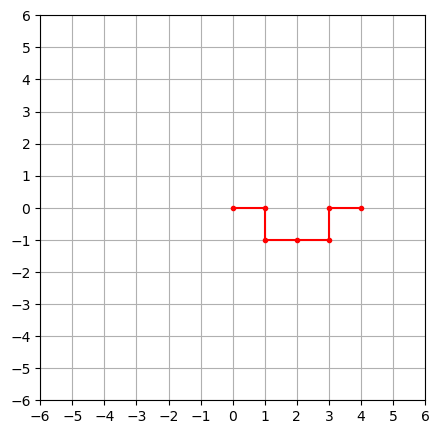

In [19]:
from numpy import zeros,array,ones,any,all,int8,copy
from matplotlib import pyplot as plt

sawLength = 6
n = sawLength + 1  

allsaws = []
singlesaw = zeros([n,2])  # this array will store the current walk. completed walks will be added to the allsaws list
directions = array([[1, 0], [-1, 0], [0,  1], [0, -1]]) # possible directions

searchDirections = zeros(n,dtype = int8) # record the index of the next direction to explore for each step of the walk
visited = zeros([n,2]) # list of previously visited sites
idx = 0   # tracks which index number of the current path we are looking at
sawcount = 0   # counts the number of valid saws for the given sawLength
while idx > -1:

    if searchDirections[idx] > 3: # if we've looked in all possible directions but none are valid...
        visited[idx,:] = [0, 0]   # forget that we went here
        idx -= 1   # and return to the previous index (go back a step)
    else:
# NOT, so this is a continue case   # v the next place     v you were going to explore   v has already been visited
        if not any( [ all(singlesaw[idx,:] + directions[searchDirections[idx],:] == visited[i,:]) for i in range(n)]):
            # search in the next direction we were planning on searching
            singlesaw[idx+1,:] = singlesaw[idx,:] + directions[searchDirections[idx],:]
            searchDirections[idx] += 1   # and search somewhere else next time
            if idx + 1 == sawLength: # if this next step would be the last...
                sawcount += 1   # then add the current saw to the list of completed, legitimate saws
                allsaws.append(copy(singlesaw))
                continue
            else:   # if this next step will NOT be the last one...
                idx += 1   # move up,
                visited[idx,:] = singlesaw[idx,:]   # mark the previous site as completed,
                searchDirections[idx] = 0   # and start the index of our next direction to search out at 0

        else:
            searchDirections[idx] += 1   # let's plan on searching in NOT a dead-end...
 

# which one do we want to show?
whichSawToPlot = 135

print("There are {} SAWs of length {}. Plotting the {}-rd one".format(sawcount,sawLength,whichSawToPlot))


# plotting
fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.plot([x[0] for x in allsaws[whichSawToPlot]],[x[1] for x in allsaws[whichSawToPlot]],'r.-')
ax.set_xlim(-sawLength, sawLength)
ax.set_ylim(-sawLength, sawLength)
ax.set_xticks(range(-sawLength, sawLength + 1,1))
ax.set_yticks(range(-sawLength, sawLength + 1,1))

ax.grid()
ax.set_aspect(1)

plt.show()
